## Part 3: Plotting Threshold v/s Recall / Precision

In [48]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import csv
import random
import math
import operator
from numpy import linalg as LA
import sys
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn import linear_model

In [49]:
df = pd.read_csv('AdmissionDataset/data.csv') 

In [50]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [51]:
from sklearn.model_selection import train_test_split  
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
train,test = train_test_split(df, test_size=0.2)
train_y = train['Chance of Admit ']
train = train.drop('Serial No.',axis=1)
train = train.drop('Chance of Admit ',axis=1)
test_y = test['Chance of Admit ']
test = test.drop('Serial No.',axis=1)
test = test.drop('Chance of Admit ',axis=1)
# train_y=np.where(train_y>=0.5,1,0)
# test_y=np.where(test_y>=0.5,1,0)
# train_y.values

In [52]:
X=train.values
X1=test.values
# print(X)
z1= np.ones((len(test),1))
X1= np.append(z1,X1, axis=1)
z = np.ones((len(train),1))
X=np.append(z,X, axis=1)
Y=train_y
X.shape

(360, 8)

In [53]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# print(beta)

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [54]:
# beta, num_iter = grad_desc(X, y, beta)


In [59]:
y=train_y
# print(y)
acc=[]
r=[]
p=[]
for x in range(4,9):
    accu=0
    x=x*0.1
    train_y1=np.where(train_y>=x,1,0)
    y=train_y1
    test_y1=np.where(test_y>=x,1,0)
#     print(test_y)
    beta = np.zeros(X.shape[1]) 
#     print((X.shape[1]))
    lr=0.01
    for i in range(30000):
        z = np.dot(X, beta)
    #     print(z.shape)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        beta -= lr * gradient
#     beta
    z = np.dot(X1, beta)
    h = sigmoid(z)
    ans=sigmoid(np.dot(X1, beta))
    ans=np.where(ans>=x,1,0)
    c=0
    tp,fp,fn,tn=0,0,0,0
    for i in range(len(X1)):
        if (test_y1[i]==ans[i]):
            c+=1
        if test_y1[i]==1 and ans[i]==1:
            tp+=1
        if test_y1[i]==1 and ans[i]==0:
            fp+=1
        if test_y1[i]==0 and ans[i]==0:
            tn+=1
        if test_y1[i]==0 and ans[i]==1:
            fn+=1

    y = (tp+fp)
    x = (tp+fn)
    if x:
        rc=tp/x
    if y:
        pc=tp/y
    r.append(rc)
    p.append(pc)
    print("\nRecall: ", rc)
    print("\nPrecision: ", pc)
    accu=c/len(X1)
    acc.append(accu)
#     print("Accuracy using Logistic Regression: ",accu)
# acc


Recall:  0.9777777777777777

Precision:  1.0

Recall:  0.9222222222222223

Precision:  1.0

Recall:  0.8555555555555555

Precision:  1.0

Recall:  0.6707317073170732

Precision:  1.0


/home/keshu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  



Recall:  1.0

Precision:  0.16666666666666666


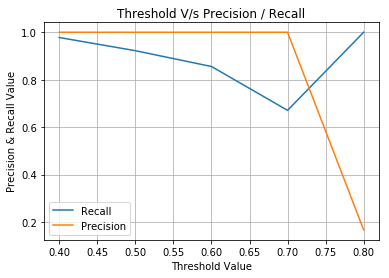

In [69]:
import matplotlib.pyplot as plt 

plt.plot([0.4,0.5,0.6,0.7,0.8], r, label = "Recall")
plt.plot([0.4,0.5,0.6,0.7,0.8], p, label = "Precision")
plt.xlabel('Threshold Value') 
plt.ylabel('Precision & Recall Value') 
plt.legend() 
plt.grid()
plt.title('Threshold V/s Precision / Recall') 
plt.show()

In [70]:
# reg = linear_model.LogisticRegression(solver='lbfgs') 
# # train the model using the training sets 
# reg.fit(train,train_y)
# pred2=reg.predict(test)
# print("Acc using SKlearn: ", accuracy_score(test_y,pred2))

## <u>Threshold value in Logictic:-<u>

### In order to map a logistic regression value to a binary category, you must define a classification threshold (also called the decision threshold value). A value above that threshold indicates "One class"; a value below indicates "Other class." It is suggested to assume that the classification threshold should always be 0.5, but thresholds are problem-dependent, and are therefore values that you must tune.

### We plotted the graph for precision and recall v/s threshold value starting from 0.1 to 1 as our label is dealing in probability of admission.
### So, decided to take leaps of 0.1 and checked the Precision and Recall values.
### Most accurate value for threshold seems to be "0.5" because our label is in probability and 1/2 probability  generally divides data in two separate halves quite accurately.
### And we found from the graph that at 0.5 value, both are nearly 1 i.e. both are high. i.e. 0.5 is optimal choice.

### Also, there is a trade-off in Precision and Recall, and Generally High Precision and High Recall are desirable. But, both if one increases much, other starts decresing.


### So threshold should be chosen such that both values are high.